In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
from toolbox import *
import datetime

import string

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01',
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['BTC', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)

In [54]:
start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)

In [130]:
# Group rows by time difference

arr = [1904, 1, 4, 5, 101, 103, 105, 106, 107, 10.9, 0, 0.5]
thres = 2
K = len(arr)


def removeDuplicate(x):
      return list(dict.fromkeys(x))

def groupRowsbyDiff(arr, thres, skip=True):
    # 
    # input : array to be grouped and threshold
    # output: a nested list of index
    
    outer = []
    group_id = []
    
    K = len(arr)
    for k in range(K):
        if k+1<K:
            if np.abs(arr[k] - arr[k+1])<=thres:
                group_id.append(k)
                group_id.append(k+1)

            elif len(group_id)==0:
                outer.append([k])

            else:
                if skip:
                    outer.append([group_id[0], group_id[-1]])
                else:
                    outer.append(group_id)
                group_id = []
                
        else:  # for the last row
            if len(group_id)==0:
                outer.append([k])
            else:
                outer.append(group_id)
                
    for i, o in enumerate(outer):
        outer[i] = removeDuplicate(o)
    return outer



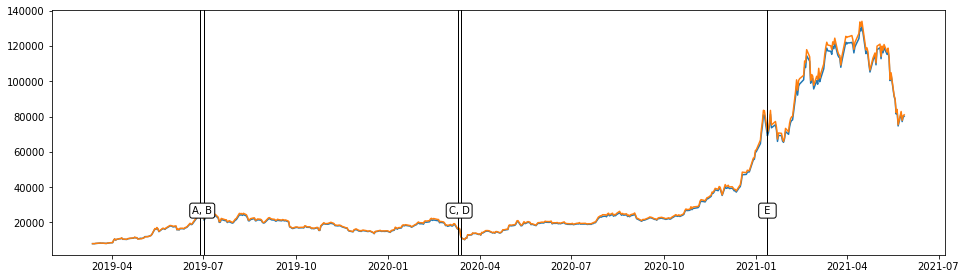

In [131]:
# BTC
n = 0
rn = order[n]
rm = 'ES q=0.05'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)


# 11/3/2019 price: BTCF : 3835.0	BTC 3841.832104021910
# 18/10/2019 (one trading before 21/10/2019) 7990.0	BTCX19 Curncy	7943.626628985650
df = df.sort_values('Date')
df.loc[:,'rsc'] = np.exp(np.cumsum(df.rs))* 7943.626628985650
df.loc[:,'rfc'] = np.exp(np.cumsum(df.rf))* 7990.0	
df.loc[:,'rhc'] = np.cumsum(df.rh)

fig, ax = plt.subplots(figsize=(16,9/2),nrows=1, sharex=True)
ax.plot(df.Date, df.rsc)
ax.plot(df.Date, df.rfc)

N = 5

ABC = string.ascii_uppercase[:N][::-1]
rs_5min = df.sort_values('rs')[:N] 
rs_5min = rs_5min.sort_values('Date', ascending=False)
rs_5min = rs_5min.reset_index(drop=True)


# Group rows by time difference
K = len(rs_5min)
thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(rs_5min.Date, thres)

for k in range(N):
    ax.axvline(x=rs_5min.Date.iloc[k], color='black', linestyle='-', linewidth=1)


for o in outer:
    if len(o)==1:
        ax.text(rs_5min.loc[o[0] , 'Date'], 25000, ' '+ABC[o[0]]+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    elif o[-1]-o[0]==1:
        t1 = rs_5min.loc[o[0] , 'Date'].value/10**9
        t2 = rs_5min.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, 25000,
                   ABC[o[-1]]+', '+ABC[o[0]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))
        
    else:
        t1 = rs_5min.loc[o[0] , 'Date'].value/10**9
        t2 = rs_5min.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, 25000,
                   ABC[o[-1]]+' - '+ABC[o[0]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))


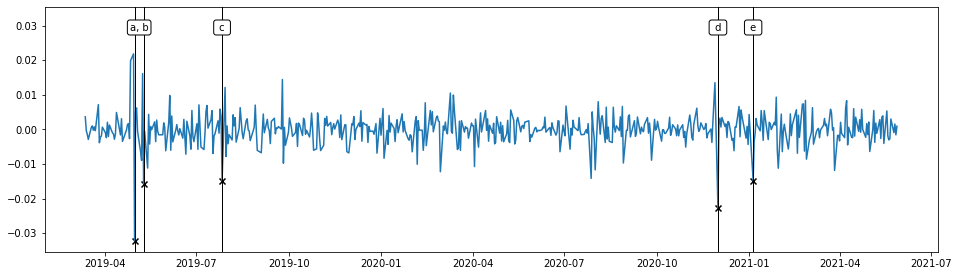

In [132]:
# BTC
n = 0
rn = order[n]
rm = 'ES q=0.05'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

df = df.sort_values('Date')
df.loc[:, 'rs_minus_rf'] = df.rs-df.rf

fig, ax = plt.subplots(figsize=(16,9/2),nrows=1, sharex=True)
ax.plot(df.Date, df.rs_minus_rf)

_max = np.max(df.rs_minus_rf)
_min = np.abs(np.min(df.rs_minus_rf))
a = np.max([_max, _min])*1.1

ylim = (-a,a)
ax.set_ylim(ylim)

abc = string.ascii_lowercase[:N]
large_diff = df.sort_values('rs_minus_rf')[:N] 
large_diff = large_diff.sort_values('Date', ascending=True)
large_diff= large_diff.reset_index(drop=True)

thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(large_diff.Date, thres)

yloc = a-(a-_max)/2

for k in range(N):
    ax.axvline(x=large_diff.Date.iloc[k], color='black', linestyle='-', linewidth=1)

for o in outer:
    if len(o)==1:
        ax.text(large_diff.loc[o[0] , 'Date'], yloc, ' '+abc[o[0]]+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    elif o[-1]-o[0]==1:
        t1 = large_diff.loc[o[0] , 'Date'].value/10**9
        t2 = large_diff.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, yloc,
                   abc[o[0]]+', '+abc[o[-1]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))
        
    else:
        t1 = large_diff.loc[o[0] , 'Date'].value/10**9
        t2 = large_diff.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, yloc,
                   abc[o[0]]+' - '+abc[o[-1]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))

for i in range(len(large_diff)):
    ax.scatter(large_diff.Date[i], large_diff.rs_minus_rf[i], marker='x', color='black')

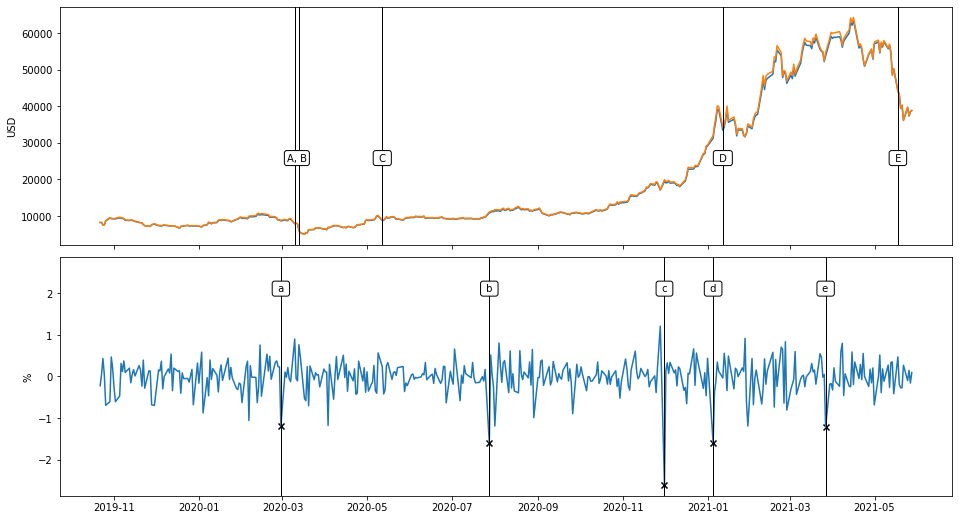

In [163]:
# BTC
n = 0
rn = order[n]
rm = 'ES q=0.05'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)
df = df.loc[df.Date >= start, :]


# 11/3/2019 price: BTCF : 3835.0	BTC 3841.832104021910
# 

df = df.sort_values('Date')
df.loc[:,'rsc'] = np.exp(np.cumsum(df.rs))* 7943.626628985650
df.loc[:,'rfc'] = np.exp(np.cumsum(df.rf))* 7990.0	
df.loc[:,'rhc'] = np.cumsum(df.rh)

fig, ax = plt.subplots(figsize=(16,9),nrows=2, sharex=True)
ax[0].plot(df.Date, df.rsc)
ax[0].plot(df.Date, df.rfc)

N = 5

ABC = string.ascii_uppercase[:N][::-1]
rs_5min = df.sort_values('rs')[:N] 
rs_5min = rs_5min.sort_values('Date', ascending=False)
rs_5min = rs_5min.reset_index(drop=True)

# Group rows by time difference
K = len(rs_5min)
thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(rs_5min.Date, thres)

for k in range(N):
    ax[0].axvline(x=rs_5min.Date.iloc[k], color='black', linestyle='-', linewidth=1)

for o in outer:
    if len(o)==1:
        ax[0].text(rs_5min.loc[o[0] , 'Date'], 25000, ' '+ABC[o[0]]+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    elif o[-1]-o[0]==1:
        t1 = rs_5min.loc[o[0] , 'Date'].value/10**9
        t2 = rs_5min.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax[0].text(pos, 25000,
                   ABC[o[-1]]+', '+ABC[o[0]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))
        
    else:
        t1 = rs_5min.loc[o[0] , 'Date'].value/10**9
        t2 = rs_5min.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax[0].text(pos, 25000,
                   ABC[o[-1]]+' - '+ABC[o[0]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))

df = df.sort_values('Date')
df.loc[:, 'rs_minus_rf'] = (df.rs-df.rf)
df.loc[:, 'Rs_minus_Rf'] = (np.exp(df.rs)-np.exp(df.rf))*100


_max = np.max(df.Rs_minus_Rf)
_min = np.abs(np.min(df.Rs_minus_Rf))
a = np.max([_max, _min])*1.1

ylim = (-a,a)
ax[1].set_ylim(ylim)

abc = string.ascii_lowercase[:N]
large_diff = df.sort_values('rs_minus_rf')[:N] 
large_diff = large_diff.sort_values('Date', ascending=True)
large_diff= large_diff.reset_index(drop=True)

thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(large_diff.Date, thres)

yloc = a-(a-_max)/2

ax[1].plot(df.Date, df.Rs_minus_Rf)

for k in range(N):
    ax[1].axvline(x=large_diff.Date.iloc[k], color='black', linestyle='-', linewidth=1)

for o in outer:
    if len(o)==1:
        ax[1].text(large_diff.loc[o[0] , 'Date'], yloc, ' '+abc[o[0]]+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    elif o[-1]-o[0]==1:
        t1 = large_diff.loc[o[0] , 'Date'].value/10**9
        t2 = large_diff.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax[1].text(pos, yloc,
                   abc[o[0]]+', '+abc[o[-1]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))
        
    else:
        t1 = large_diff.loc[o[0] , 'Date'].value/10**9
        t2 = large_diff.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax[1].text(pos, yloc,
                   abc[o[0]]+' - '+abc[o[-1]],
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))

for i in range(len(large_diff)):
    ax[1].scatter(large_diff.Date[i], large_diff.Rs_minus_Rf[i], marker='x', color='black')

ax[0].set_ylabel('USD')

ax[1].set_ylabel('%')
        
plt.subplots_adjust(left=None,
                bottom=None, 
                right=None, 
                top=None,
                wspace=None,
                hspace=0.05)

plt.savefig('../../latex/_pics/BTC_price.pdf', transparent=True, bbox_inches='tight')


In [181]:
print(rs_5min.Date, np.exp(rs_5min.rs)-1)

0   2021-05-17 20:00:00
1   2021-01-11 21:00:00
2   2020-05-11 20:00:00
3   2020-03-12 20:00:00
4   2020-03-09 20:00:00
Name: Date, dtype: datetime64[ns] 0   -0.118638
1   -0.144081
2   -0.121071
3   -0.228922
4   -0.138304
Name: rs, dtype: float64


In [182]:
large_diff.loc[:, ['Date', 'Rs_minus_Rf', 'rs', 'rf']]

,Date,Rs_minus_Rf,rs,rf
0,2020-02-28 21:00:00,-1.190619,-0.030822,-0.018618
1,2020-07-27 20:00:00,-1.600780,0.118575,0.132693
2,2020-11-30 21:00:00,-2.613030,0.129829,0.152519
3,2021-01-04 21:00:00,-1.591558,0.069894,0.084626
4,2021-03-26 20:00:00,-1.225758,0.030031,0.041856


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


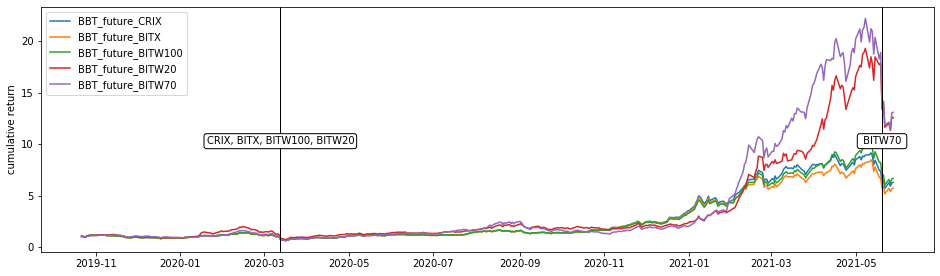

In [184]:
fig, ax = plt.subplots(figsize=(16,9/2),nrows=1, sharex=True)

for n in range(1,6):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    df = df.loc[df.Date >= start, :]
    # 11/3/2019 price: BTCF : 3835.0	BTC 3841.832104021910

    df = df.sort_values('Date')
    df.loc[:,'rsc'] = np.exp(np.cumsum(df.rs))
    df.loc[:,'rfc'] = np.exp(np.cumsum(df.rf))
    df.loc[:,'rhc'] = np.cumsum(df.rh)

    ax.plot(df.Date, df.rsc, label=order[n])
    
plt.legend()

thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(large_diff.Date, thres)

_min_rs_df = pd.DataFrame()

for n in range(1,6):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    _min_rs = df.iloc[np.argmin(df.rs),:]
    _min_rs.loc['coin'] = new_coin_names[n]
    _min_rs_df = _min_rs_df.append(_min_rs)
    ax.axvline(x=_min_rs.Date, color='black', linestyle='-', linewidth=1)
    
_min_rs_df = _min_rs_df.reset_index(drop=True)

outer = groupRowsbyDiff(_min_rs_df.Date, thres, skip=False)

yloc = 10
for o in outer:
    if len(o)==1:
        label = _min_rs_df.loc[o[0], 'coin']
        ax.text(_min_rs_df.loc[o[0] , 'Date'], yloc, ' '+label+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    else:
        label_arr = [_min_rs_df.loc[o[i], 'coin'] for i in range(len(o))]
        t1 = _min_rs_df.loc[o[0] , 'Date'].value/10**9
        t2 = _min_rs_df.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, yloc,
                   ', '.join(label_arr),
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))


ax.set_ylabel('cumulative return')
        
plt.savefig('../../latex/_pics/index_price.pdf', transparent=True, bbox_inches='tight')


In [185]:
_min_rs_df.loc[:,'Rs'] = np.exp(_min_rs_df.loc[:, 'rs'])-1
_min_rs_df

,Date,Unnamed: 0,coin,copula,h,rf,rh,rs,Rs
0,2020-03-12 20:00:00,0.0,CRIX,NIG,0.903383,-0.269920,-0.027544,-0.271385,-0.237677
1,2020-03-12 20:00:00,1.0,BITX,t_Copula,0.945020,-0.269920,-0.015140,-0.270220,-0.236788
2,2020-03-12 20:00:00,1.0,BITW100,rotGumbel,0.859961,-0.269920,-0.040574,-0.272694,-0.238674
3,2020-03-12 20:00:00,1.0,BITW20,rotGumbel,0.748242,-0.269920,-0.108126,-0.310092,-0.266620
4,2021-05-19 20:00:00,1.0,BITW70,rotGumbel,0.884082,-0.090465,-0.243474,-0.323453,-0.276354


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


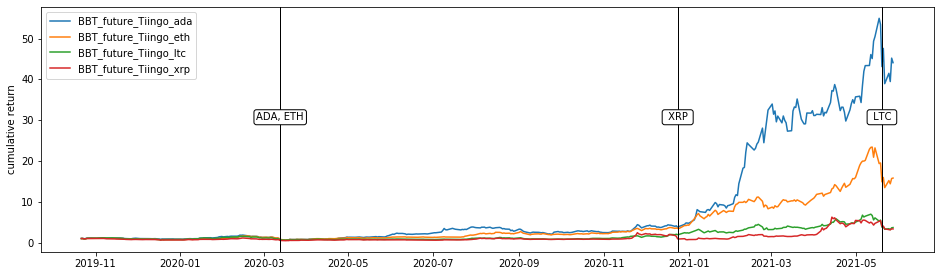

In [186]:
fig, ax = plt.subplots(figsize=(16,9/2),nrows=1, sharex=True)

for n in range(6,len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    df = df.loc[df.Date >= start, :]
    # 11/3/2019 price: BTCF : 3835.0	BTC 3841.832104021910

    df = df.sort_values('Date')
    df.loc[:,'rsc'] = np.exp(np.cumsum(df.rs))
    df.loc[:,'rfc'] = np.exp(np.cumsum(df.rf))
    df.loc[:,'rhc'] = np.cumsum(df.rh)

    ax.plot(df.Date, df.rsc, label=order[n])

plt.legend()

thres = datetime.timedelta(days=15)
outer = groupRowsbyDiff(large_diff.Date, thres)

_min_rs_df = pd.DataFrame()

for n in range(6,len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    _min_rs = df.iloc[np.argmin(df.rs),:]
    _min_rs.loc['coin'] = new_coin_names[n]
    _min_rs_df = _min_rs_df.append(_min_rs)
    ax.axvline(x=_min_rs.Date, color='black', linestyle='-', linewidth=1)
    
_min_rs_df = _min_rs_df.reset_index(drop=True)

yloc = 30
outer = groupRowsbyDiff(_min_rs_df.Date, thres, skip=False)

for o in outer:
    if len(o)==1:
        label = _min_rs_df.loc[o[0], 'coin']
        ax.text(_min_rs_df.loc[o[0] , 'Date'], yloc, ' '+label+' ',
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'))
        
    else:
        label_arr = [_min_rs_df.loc[o[i], 'coin'] for i in range(len(o))]
        t1 = _min_rs_df.loc[o[0] , 'Date'].value/10**9
        t2 = _min_rs_df.loc[o[-1] , 'Date'].value/10**9
        pos = datetime.datetime.fromtimestamp((t1+t2)/2)
           
        ax.text(pos, yloc,
                   ', '.join(label_arr),
                   ha='center', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.25'))

ax.set_ylabel('cumulative return')
        
plt.savefig('../../latex/_pics/individualCoins_price.pdf', transparent=True, bbox_inches='tight')

In [188]:
_min_rs_df.loc[:,'Rs'] = np.exp(_min_rs_df.loc[:, 'rs'])-1
_min_rs_df

,Date,Unnamed: 0,coin,copula,h,rf,rh,rs,Rs
0,2020-03-12 20:00:00,1.0,ADA,NIG,0.752196,-0.269920,-0.065495,-0.268528,-0.235496
1,2020-03-12 20:00:00,1.0,ETH,rotGumbel,0.815137,-0.269920,-0.100123,-0.320144,-0.273956
2,2021-05-19 20:00:00,1.0,LTC,NIG,1.009279,-0.090465,-0.284608,-0.375913,-0.313338
3,2020-12-23 21:00:00,2.0,XRP,rotGumbel,0.774414,-0.002524,-0.525698,-0.527652,-0.410012
